# PCA 
## Ammar, Luisa, Myriam
## group LAMA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from PIL import Image

# Q1

c:\Users\Ammar El-Saeed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'X_1'), Text(0, 0.5, 'X_2'), Text(0.5, 1.0, 'Centred Data')]

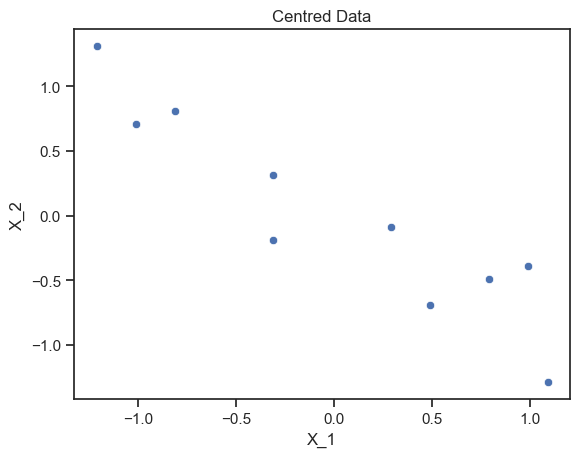

In [105]:
data_2d = np.loadtxt('pca-data-2d.dat')
data_2d = data_2d  - np.average(data_2d, axis=0)
gfg = sns.scatterplot(data_2d[:,0],data_2d[:,1],)
gfg.set(xlabel ="X_1", ylabel = "X_2", title ='Centred Data')

c:\Users\Ammar El-Saeed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'X_1'),
 Text(0, 0.5, 'X_2'),
 Text(0.5, 1.0, 'Reconstructed Data')]

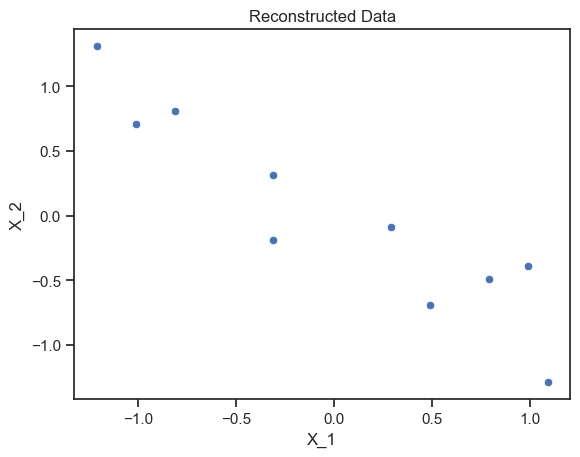

In [106]:
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(data_2d)
reconstruction = pca.inverse_transform(transformed_data)
gfg = sns.scatterplot(reconstruction[:,0],reconstruction[:,1],)
gfg.set(xlabel ="X_1", ylabel = "X_2", title ='Reconstructed Data')

c:\Users\Ammar El-Saeed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'PC_1'),
 Text(0, 0.5, 'PC_2'),
 Text(0.5, 1.0, 'Transformed Data')]

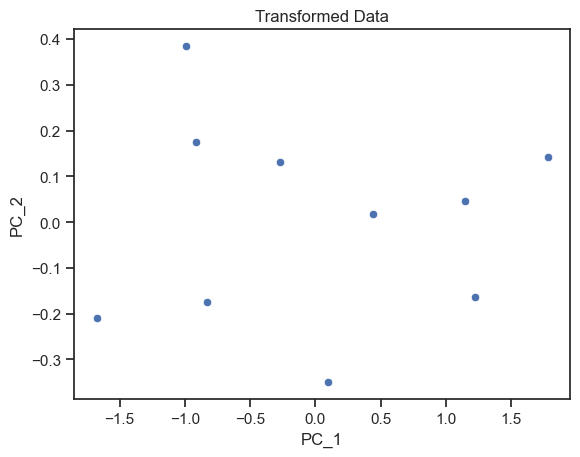

In [107]:
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(data_2d)
gfg = sns.scatterplot(transformed_data[:,0],transformed_data[:,1],)
gfg.set(xlabel ="PC_1", ylabel = "PC_2", title ='Transformed Data')


c:\Users\Ammar El-Saeed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'X_1'),
 Text(0, 0.5, 'X_2'),
 Text(0.5, 1.0, 'PC_1 Reconstruction')]

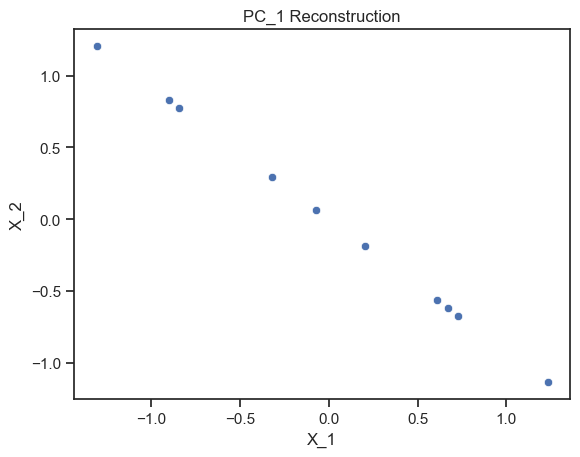

In [108]:
pc_1_transformed = data_2d @ pca.components_[:,0]  # 10 * 2 @ 2*1 = 10*1 

pc_1_recon = pc_1_transformed.reshape((10,1)) @ pca.components_[:,0].reshape((2,1)).T # 10*1 * 1*2 = 10*2
gfg = sns.scatterplot(pc_1_recon[:,0],pc_1_recon[:,1],)
gfg.set(xlabel ="X_1", ylabel = "X_2", title ='PC_1 Reconstruction')

In [110]:
pca.components_.shape

(2, 2)

c:\Users\Ammar El-Saeed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'X_1'),
 Text(0, 0.5, 'X_2'),
 Text(0.5, 1.0, 'PC_2 Reconstruction')]

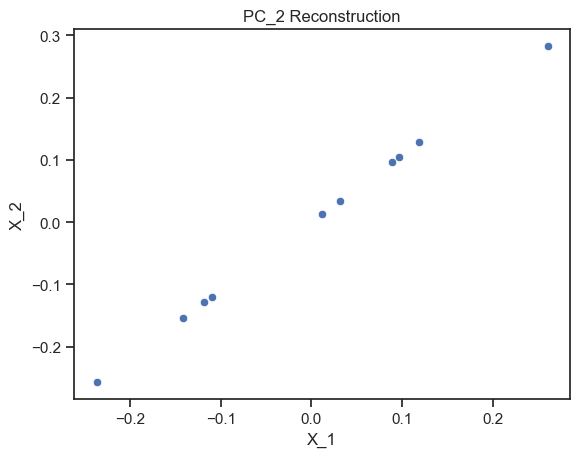

In [113]:
pc_2_transformed = data_2d @ pca.components_[:,1]  # 10 * 2 @ 2*1 = 10*1 

pc_2_recon = pc_2_transformed.reshape((10,1)) @ pca.components_[:,1].reshape((2,1)).T # 10*1 * 1*2 = 10*2
gfg = sns.scatterplot(pc_2_recon[:,0],pc_2_recon[:,1],)
gfg.set(xlabel ="X_1", ylabel = "X_2", title ='PC_2 Reconstruction')

# Q2

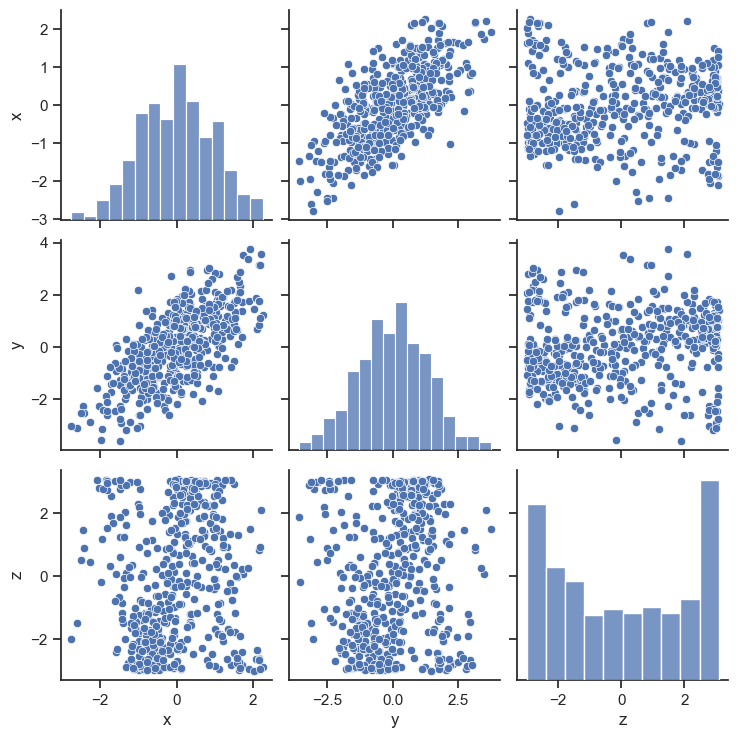

In [62]:
import pandas as pd
data_3d = pd.read_csv('pca-data-3d.txt', delimiter=',')
data_3d = data_3d.apply(lambda x: x-x.mean())

sns.set_theme(style="ticks")
sns.pairplot(data_3d,)

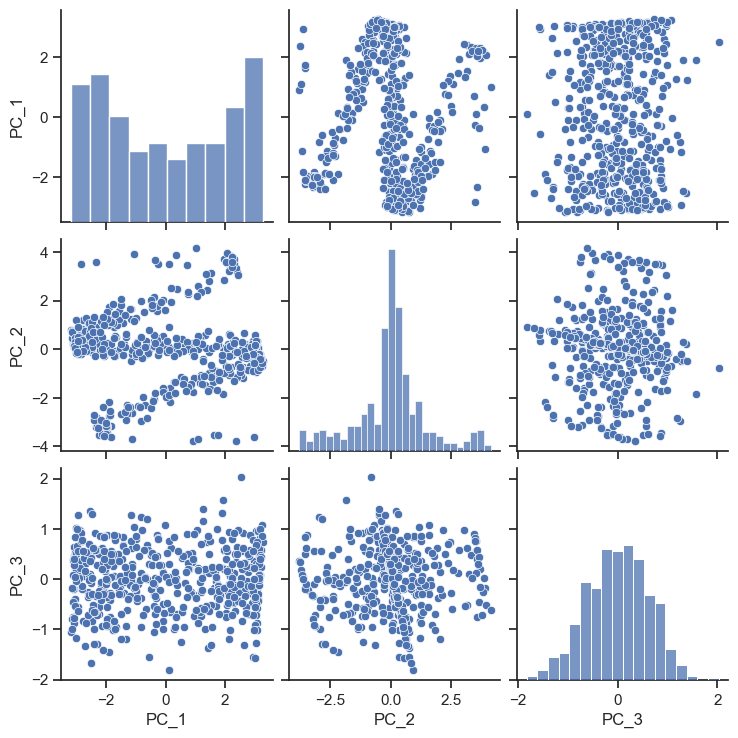

In [79]:
pca = PCA(n_components=3)
transformed_data = pca.fit_transform(data_3d)
transformed_data = pd.DataFrame(data = transformed_data,  
                  columns = ["PC_1",'PC_2',"PC_3"])
sns.set_theme(style="ticks")
sns.pairplot(transformed_data,)

In [80]:
pca.components_

array([[ 0.12121678,  0.1844957 ,  0.9753296 ],
       [-0.51120047, -0.83065188,  0.22066159],
       [-0.85087048,  0.52533684,  0.00637466]])

In [81]:
pca.explained_variance_

array([4.4947884 , 2.24956199, 0.38503192])

In [69]:
def plot_reconstructions(n_components , data_3d,  ):
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(data_3d)
    reconstructed_data = pca.inverse_transform(transformed_data)
    transformed_data = pd.DataFrame(data = reconstructed_data,  
                    columns = ["x",'y','z'])
    sns.set_theme(style="ticks")
    sns.pairplot(transformed_data,)

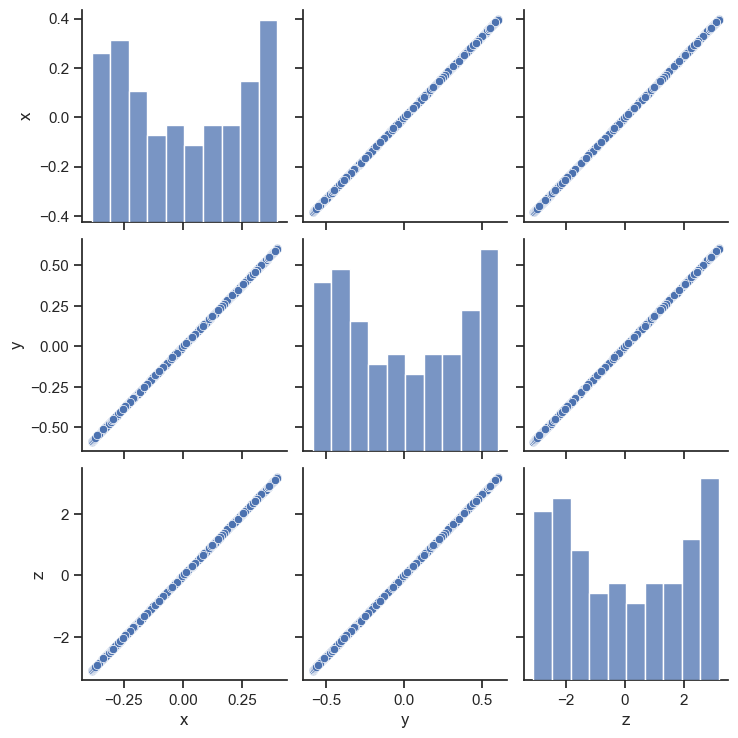

In [70]:
plot_reconstructions(1 , data_3d,  )

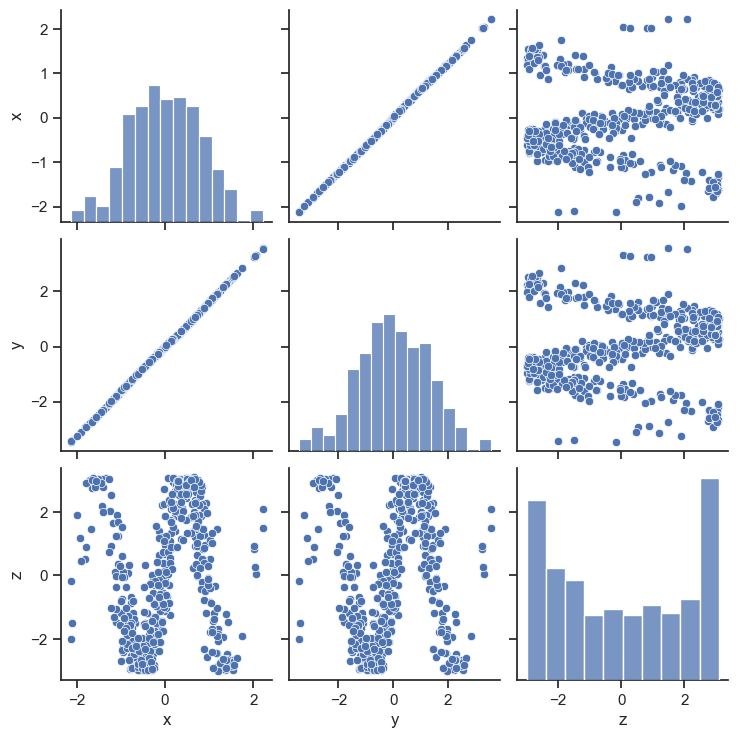

In [71]:
plot_reconstructions(2 , data_3d,  )

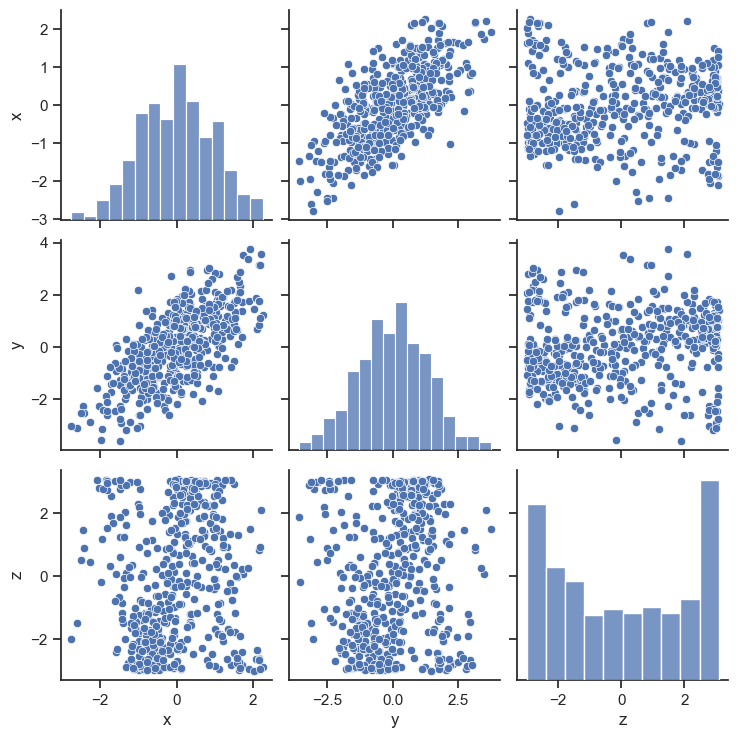

In [72]:
plot_reconstructions(3 , data_3d,  )

### Discuss how useful these principal directions are.
> using the first component only we get a plot that captures the direction of maximal variance, which was good enough to represent the x-y plots since th variance in a single direction is much bigger than the other. 
>  adding the second principal component we can capture the more complicated patter of z-x and z-y plot, but it does not change the x-y plots, suggesting that this component is orthogonal on the x-y plane. 
> Finally using all the components gives a perfect reconstruction of the data.

# Q3 

c:\Users\Ammar El-Saeed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


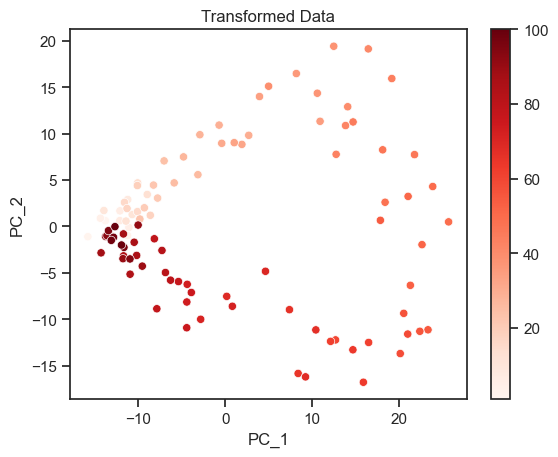

In [162]:
exp_data = pd.read_csv('expDat.txt')
exp_data.iloc[:,1:] = exp_data.iloc[:,1:].apply(lambda x: x-x.mean())

pca = PCA(n_components=2)
transformed_data = pca.fit_transform(exp_data.iloc[:,1:])


norm = plt.Normalize(exp_data.iloc[:,0].min(), exp_data.iloc[:,0].max())
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])
gfg = sns.scatterplot(transformed_data[:,0],transformed_data[:,1],hue = exp_data.iloc[:,0], palette= 'Reds')

gfg.set(xlabel ="PC_1", ylabel = "PC_2", title ='Transformed Data')
gfg.get_legend().remove()
gfg.figure.colorbar(sm)


c:\Users\Ammar El-Saeed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Ammar El-Saeed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.45, -0.08, 'Reds:  Projection using PC_1 \n Greens: Projection using PC_2')

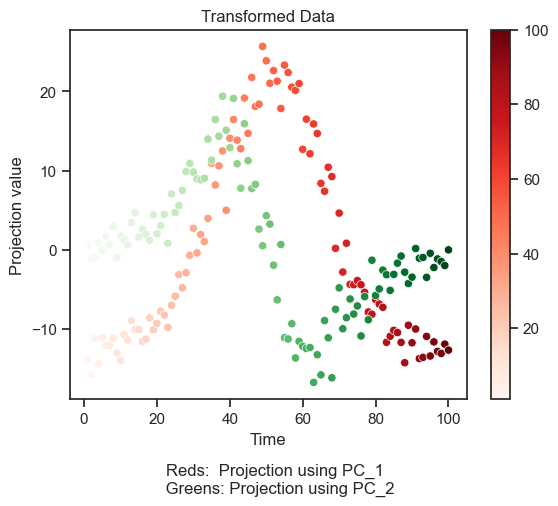

In [165]:
pc_1_transformed = exp_data.iloc[:,1:].to_numpy() @ pca.components_[0,:].T
pc_2_transformed = exp_data.iloc[:,1:].to_numpy() @ pca.components_[1,:].T

norm = plt.Normalize(exp_data.iloc[:,0].min(), exp_data.iloc[:,0].max())
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])
gfg = sns.scatterplot(exp_data.iloc[:,0],pc_1_transformed, hue = exp_data.iloc[:,0], palette= 'Reds')
gfg = sns.scatterplot(exp_data.iloc[:,0],pc_2_transformed, hue = exp_data.iloc[:,0], palette= 'Greens')
gfg.set(xlabel ="Time", ylabel = "Projection value", title ='Transformed Data')
gfg.get_legend().remove()
gfg.figure.colorbar(sm)
txt="Reds:  Projection using PC_1 \n Greens: Projection using PC_2"
plt.figtext(0.45, -0.08, txt, wrap=True, horizontalalignment='center', fontsize=12)

[Text(0.5, 1.0, 'Scrambled Data')]

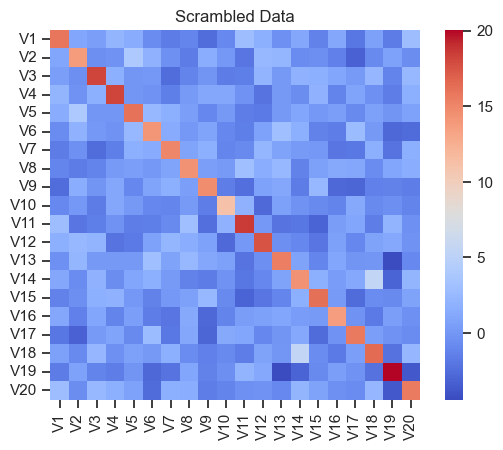

In [176]:
scrambled_data = exp_data.copy(deep=True)
# scrambled_data.head() ,  exp_data.head()
scrambled_data = scrambled_data.apply(lambda x: x.sample(frac=1).values)
scrambled_cov = scrambled_data.iloc[:,1:].cov()

gfg = sns.heatmap(scrambled_cov,
                 cbar=True,
                 
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm')
gfg.set(title ='Scrambled Data')

[Text(0.5, 1.0, 'Original Data')]

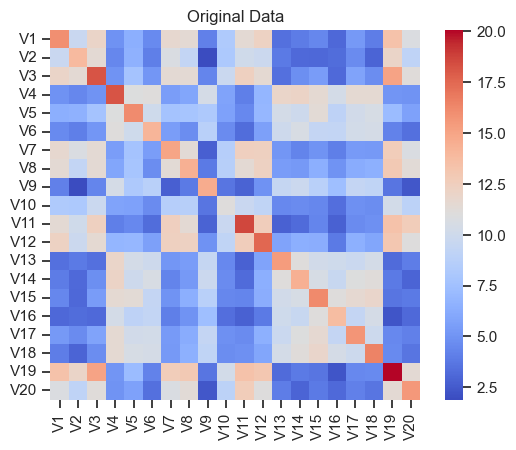

In [175]:
exp_cov = exp_data.iloc[:,1:].cov()
gfg = sns.heatmap(exp_cov,
                 cbar=True,
                 
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm')
gfg.set(title ='Original Data')

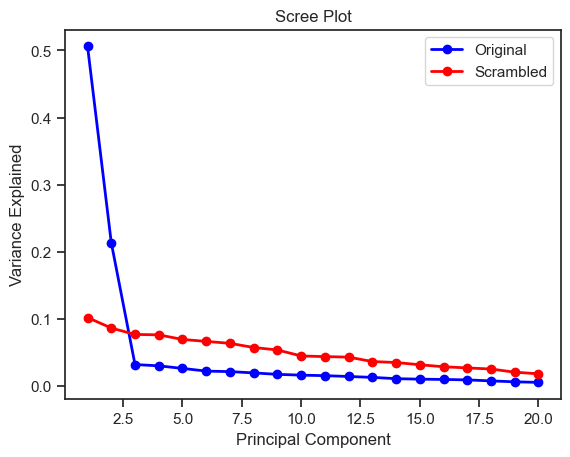

In [178]:
pca_original = PCA(n_components=20)
pca_original.fit(exp_data.iloc[:,1:])

pca_scrambled = PCA(n_components=20)
pca_scrambled.fit(scrambled_data.iloc[:,1:])

PC_values = np.arange(pca_original.n_components_) + 1
plt.plot(PC_values, pca_original.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.plot(PC_values, pca_scrambled.explained_variance_ratio_, 'o-', linewidth=2, color='red')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.legend(['Original','Scrambled'])
plt.show()

### Interpret these results.
shuffling the data resulted in lower covariances between the variables. which led the variances in each direction to be very similar, hence the PCs have very close explained variances (and eigen values). as opposed to the original data which have higher covariances, hence one PC has an explained variance of 50%, and PCA is more useful in this case.

### What would be the result if we use them same shuffling for all columns, i.e. randomizing only the row order?
 in this case the covariance matrices of shuffled and unshuffeled data will be similar, shuffeling would not affect the utility of PCA.

# Q4

## a)

In [2]:
def get_pixel (typ, size):
    pixels = np.empty((500*size,256))
    indice = 0
    for num in range(1,size + 1):
        im = Image.open (typ +str(num)+'.jpg')
        pix = im.load()
        for i in range(500):
            image = []
            start_window = np.random.randint((im.size[0]-16, im.size[1]-16))
            for x in range(start_window[0],start_window[0]+16):
                for y in range(start_window[1], start_window[1]+16):
                    image.append(pix[x,y])
            pixels[indice] = image
            indice +=1
    return pixels

building_pixels = get_pixel('b', 10)
nature_pixels = get_pixel('n',13)

## b)

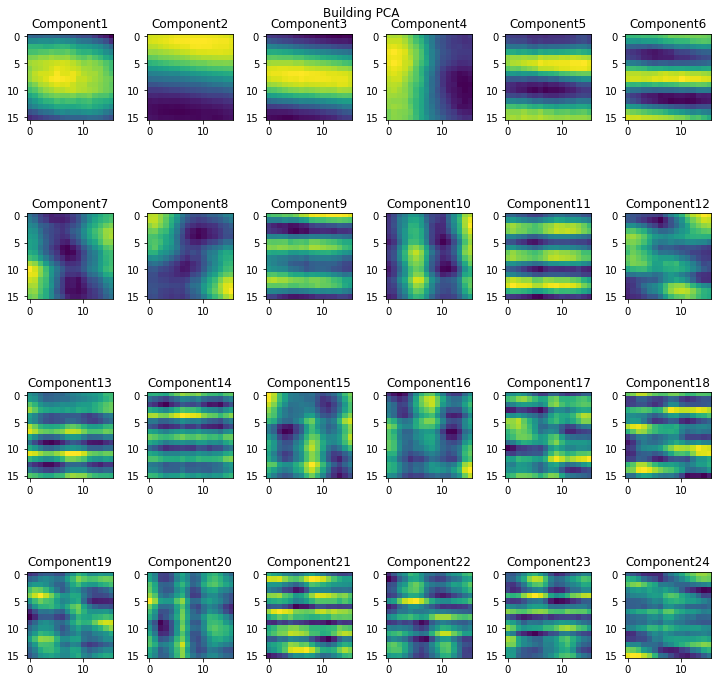

In [3]:
pca_b = PCA(n_components=100)
pca_n = PCA(n_components=100)

pca_b.fit(building_pixels)
pca_n.fit(nature_pixels)

fig, ax = plt.subplots (nrows= 4, ncols=6, figsize = (10,10))
fig.tight_layout(pad = 0.25)
indice = 0
for i in range (4):
    for j in range(6):
        transformed = pca_b.components_[indice]
        image = transformed.reshape([16,16])
        ax[i][j].imshow(image)
        ax[i][j].set_title('Component'+ str(indice+1))
        indice +=1
fig.suptitle('Building PCA')
plt.show()

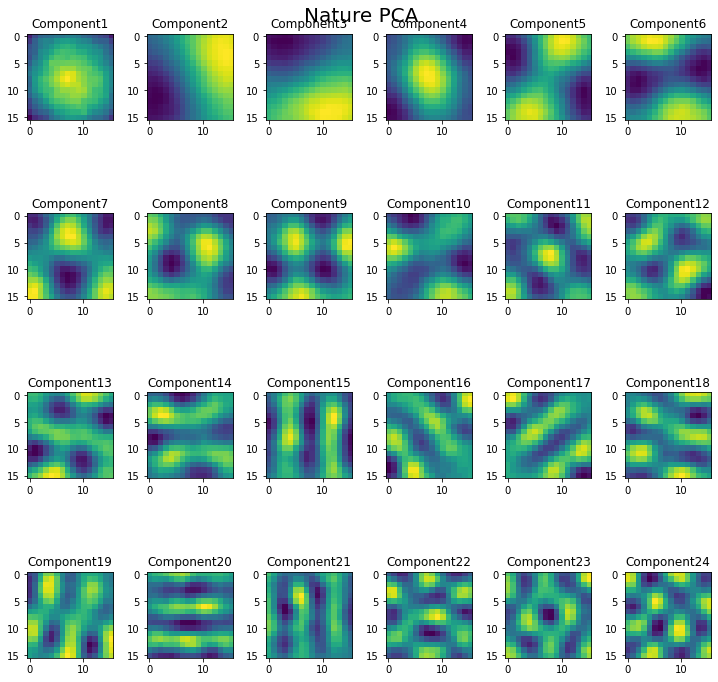

In [8]:
fig, ax = plt.subplots (nrows= 4, ncols=6, figsize = (10,10))
fig.tight_layout(pad = 0.25)
indice = 0
for i in range (4):
    for j in range(6):
        transformed = pca_n.components_[indice]
        image = transformed.reshape([16,16])
        ax[i][j].imshow(image)
        ax[i][j].set_title('Component'+ str(indice+1))
        indice +=1
fig.suptitle('Nature PCA', size = 20)
plt.show()

## c)

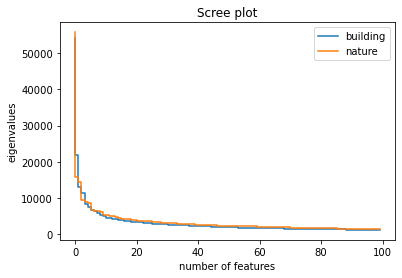

In [9]:

plt.plot(pca_b.singular_values_, label = 'building', drawstyle = 'steps')
plt.plot(pca_n.singular_values_,label = 'nature', drawstyle = 'steps')
plt.xlabel('number of features')
plt.legend()
plt.ylabel('eigenvalues')
plt.title('Scree plot')
plt.show()



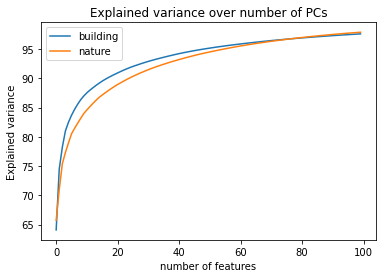

In [10]:
plt.plot(np.cumsum(pca_b.explained_variance_ratio_)*100, label = 'building')
plt.plot(np.cumsum(pca_n.explained_variance_ratio_)*100, label = 'nature')
plt.xlabel('number of features')
plt.ylabel('Explained variance')
plt.title('Explained variance over number of PCs')
plt.legend()
plt.show()

For the same number of features, the explained variance is higher for the building images than for the nature images, this means that for the same compression, less features are necessary for the building images.
For an 80% explained variance, it would be necessary to take the first 3 PCs of the buildings images and the first 5 PCs of the nature images

### d

We didn't really understand the question and how to visualize everything

In [11]:
 def all_patches (name):
    patches = []
    im = Image.open (name)
    pix = im.load()
    for i in range(0,im.size[0]-16, 16):
        for j in range(0,im.size[1]-16, 16):
            image =  []
            for x in range(i,i+16):
                for y in range(j,j+16):
                    image.append(pix[x,y])
            patches.append(image)
    return np.array(patches)



# get the images projected onto all of the PCs
# this was putting all of the patches at once, but i don't think that was the point
building_1_transform = pca_b.transform( all_patches('b1.jpg'))
building_2_transform = pca_b.transform( all_patches('b2.jpg'))
building_3_transform = pca_b.transform( all_patches('b3.jpg'))
nature_1_transform = pca_n.transform( all_patches('n1.jpg'))
nature_2_transform = pca_n.transform( all_patches('n2.jpg'))
nature_3_transform = pca_n.transform( all_patches('n3.jpg'))


In [13]:
 def all_patches_2 (name, pca_t, pca_r):
    #pca_t pc for the transformation
    #pca_r for the reprojection
        
    # goal is to have original image and the transformed and reprojected image 
    patches = []
    im = Image.open (name)
    pix = im.load()
    transformed = []

    for i in range(0,im.size[0]-16, 16):
        for j in range(0,im.size[1]-16, 16):
            image =  []
            for x in range(i,i+16):
                for y in range(j,j+16):
                    image.append(pix[x,y])
            transformed.append(pca_r.inverse_transform(pca_t.transform(np.reshape(image, (1,-1)))))
            patches.append(image)
            
    return np.reshape(patches, (i+16, j+16)), np.reshape(transformed,(i+16,j+16))




building_1_patches, building_1_transformed = all_patches_2('b1.jpg', pca_b, pca_b)

